In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
from tqdm import tqdm
from datetime import datetime

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

from sklearn.decomposition import PCA

from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test, dev_train_vali_converge

In [6]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [7]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2024-10-10_17-20-51/


In [8]:
model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.99)
train_losses, vali_losses = train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=3, device=torch.device('cuda'), save_path=save_path+'Static/')

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000208: 100%|██████████| 469/469 [00:02<00:00, 186.96it/s]


====> Epoch: 0 Average loss: 0.0353


/home/david/Documents/UNI_LOCAL/PyTorch/MarkosCode/solver.py:308: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0197
Directory created: /home/david/sparsify_models/AE/MNIST/2024-10-10_17-20-51/Static/
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:02<00:00, 195.84it/s]


====> Epoch: 1 Average loss: 0.0184
====> Test set loss: 0.0170
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000189: 100%|██████████| 469/469 [00:02<00:00, 184.48it/s]


====> Epoch: 2 Average loss: 0.0174
====> Test set loss: 0.0169
Weights saved.
All train losses saved.


In [9]:
n_epochs = 16

size_ls = [4,10,16,32]
manner = 'cell_division'

train_loss, test_loss = dev_train_vali_all_epochs(model,size_ls,manner,train_loader,test_loader,optimizer,n_epochs,device='cpu',save_path=save_path+'Dev/{}/'.format(manner))

Directory created: /home/david/sparsify_models/AE/MNIST/2024-10-10_17-20-51/Dev/cell_division/


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.001296: 100%|██████████| 469/469 [00:05<00:00, 86.61it/s]

====> Epoch: 0 Average loss: 0.1230


====> Test set loss: 0.1252
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


/home/david/Documents/UNI_LOCAL/PyTorch/MarkosCode/solver.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path + 'model_weights_epoch{}.pt

====> Epoch: 1 Average loss: 0.0628


====> Test set loss: 0.0543
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000465: 100%|██████████| 469/469 [00:05<00:00, 85.90it/s]

====> Epoch: 2 Average loss: 0.0503


====> Test set loss: 0.0488
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000495: 100%|██████████| 469/469 [00:05<00:00, 80.83it/s]

====> Epoch: 3 Average loss: 0.0487


====> Test set loss: 0.0484
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000520: 100%|██████████| 469/469 [00:05<00:00, 86.11it/s]

====> Epoch: 4 Average loss: 0.0487


====> Test set loss: 0.0478
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000442: 100%|██████████| 469/469 [00:05<00:00, 88.80it/s]


====> Epoch: 5 Average loss: 0.0460
====> Test set loss: 0.0430
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000432: 100%|██████████| 469/469 [00:05<00:00, 85.77it/s]

====> Epoch: 6 Average loss: 0.0424


====> Test set loss: 0.0417
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000435: 100%|██████████| 469/469 [00:05<00:00, 85.91it/s]


====> Epoch: 7 Average loss: 0.0421
====> Test set loss: 0.0417
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000443: 100%|██████████| 469/469 [00:05<00:00, 83.95it/s]

====> Epoch: 8 Average loss: 0.0420


====> Test set loss: 0.0415
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000423: 100%|██████████| 469/469 [00:06<00:00, 68.71it/s]

====> Epoch: 9 Average loss: 0.0414


====> Test set loss: 0.0400
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [44928/60000 (100%)]	Loss: 0.000370: 100%|██████████| 469/469 [00:05<00:00, 89.28it/s] 

====> Epoch: 10 Average loss: 0.0390


====> Test set loss: 0.0366
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [44928/60000 (100%)]	Loss: 0.000376: 100%|██████████| 469/469 [00:05<00:00, 92.33it/s] 

====> Epoch: 11 Average loss: 0.0359


====> Test set loss: 0.0345
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [44928/60000 (100%)]	Loss: 0.000349: 100%|██████████| 469/469 [00:04<00:00, 109.86it/s]

====> Epoch: 12 Average loss: 0.0342


====> Test set loss: 0.0322
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [44928/60000 (100%)]	Loss: 0.000327: 100%|██████████| 469/469 [00:04<00:00, 106.06it/s]

====> Epoch: 13 Average loss: 0.0324


====> Test set loss: 0.0318
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [44928/60000 (100%)]	Loss: 0.000308: 100%|██████████| 469/469 [00:04<00:00, 99.70it/s] 

====> Epoch: 14 Average loss: 0.0322


====> Test set loss: 0.0316
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 15 [44928/60000 (100%)]	Loss: 0.000331: 100%|██████████| 469/469 [00:04<00:00, 114.87it/s]

====> Epoch: 15 Average loss: 0.0321


====> Test set loss: 0.0315
Weights saved.
All train losses saved.


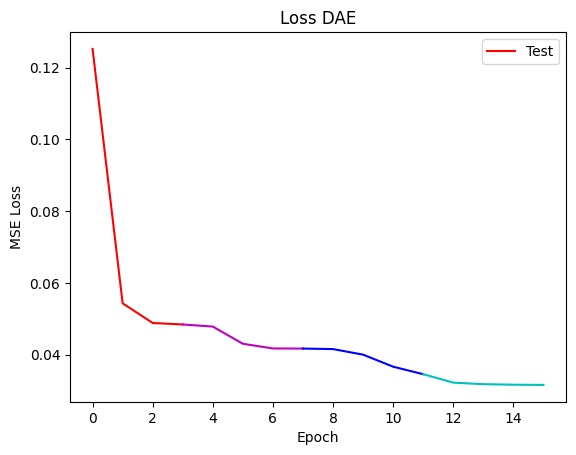

In [10]:
segment_size = n_epochs // len(size_ls)
colors = ['r', 'm', 'b', 'c', 'g', 'y', 'k']

plt.figure()

# Plot each segment with a different color
for i in range(0, len(test_loss), segment_size):
    if i == 0:
        plt.plot(
            range(i, min(i + segment_size, len(test_loss))),
            test_loss[i:i + segment_size],
            color=colors[(i // segment_size) % len(colors)]
        )
    else:
        plt.plot(
            range(i - 1, min(i + segment_size, len(test_loss))),
            test_loss[i -1:i + segment_size],
            color=colors[(i // segment_size) % len(colors)],
        )

plt.legend(['Test'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss DAE')
plt.show()

In [11]:
size_ls = [4,10,16,32]
manner = 'cell_division'

train_loss, test_loss = dev_train_vali_converge(model,size_ls,manner,train_loader,test_loader,optimizer,device='cpu',save_path=save_path+'Dev/{}/'.format(manner))

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.001175: 100%|██████████| 469/469 [00:03<00:00, 125.79it/s]


====> Epoch: 0 Average loss: 0.1183
====> Test set loss: 0.1205
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000522: 100%|██████████| 469/469 [00:04<00:00, 115.43it/s]


====> Epoch: 1 Average loss: 0.0620
====> Test set loss: 0.0522
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000503: 100%|██████████| 469/469 [00:04<00:00, 107.32it/s]

====> Epoch: 2 Average loss: 0.0499


====> Test set loss: 0.0485
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000490: 100%|██████████| 469/469 [00:05<00:00, 89.43it/s]

====> Epoch: 3 Average loss: 0.0485


====> Test set loss: 0.0482
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000504: 100%|██████████| 469/469 [00:05<00:00, 89.62it/s] 

====> Epoch: 3 Average loss: 0.0485


====> Test set loss: 0.0464
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000442: 100%|██████████| 469/469 [00:04<00:00, 98.28it/s] 

====> Epoch: 4 Average loss: 0.0454


====> Test set loss: 0.0442
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000447: 100%|██████████| 469/469 [00:04<00:00, 98.96it/s] 

====> Epoch: 5 Average loss: 0.0432


====> Test set loss: 0.0419
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000438: 100%|██████████| 469/469 [00:03<00:00, 118.99it/s]

====> Epoch: 5 Average loss: 0.0431


====> Test set loss: 0.0415
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000420: 100%|██████████| 469/469 [00:03<00:00, 118.88it/s]

====> Epoch: 6 Average loss: 0.0407


====> Test set loss: 0.0389
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000366: 100%|██████████| 469/469 [00:04<00:00, 117.22it/s]

====> Epoch: 7 Average loss: 0.0380


====> Test set loss: 0.0362
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000362: 100%|██████████| 469/469 [00:03<00:00, 119.11it/s]

====> Epoch: 8 Average loss: 0.0357


====> Test set loss: 0.0342
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000346: 100%|██████████| 469/469 [00:03<00:00, 118.58it/s]

====> Epoch: 9 Average loss: 0.0337


====> Test set loss: 0.0324
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [44928/60000 (100%)]	Loss: 0.000330: 100%|██████████| 469/469 [00:04<00:00, 108.76it/s]


====> Epoch: 10 Average loss: 0.0324
====> Test set loss: 0.0316
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [44928/60000 (100%)]	Loss: 0.000311: 100%|██████████| 469/469 [00:16<00:00, 28.99it/s] 

====> Epoch: 10 Average loss: 0.0331


====> Test set loss: 0.0316
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [44928/60000 (100%)]	Loss: 0.000350: 100%|██████████| 469/469 [00:04<00:00, 116.75it/s]

====> Epoch: 11 Average loss: 0.0320


====> Test set loss: 0.0315


Text(0.5, 1.0, 'Loss AE')

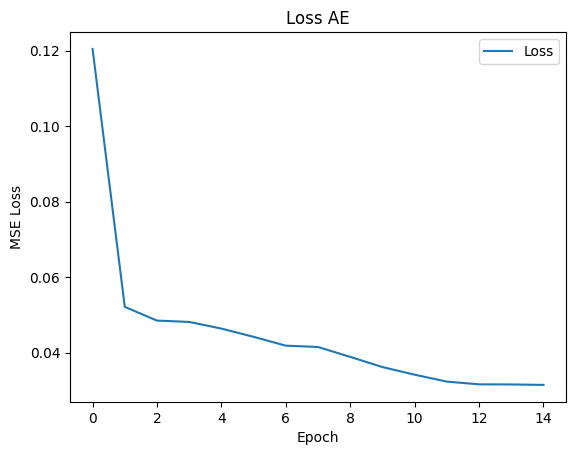

In [12]:
plt.figure()
plt.plot(test_loss,label='Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss AE')